 <embed type="text/html" src="./test.html" width="500" height="200"> 

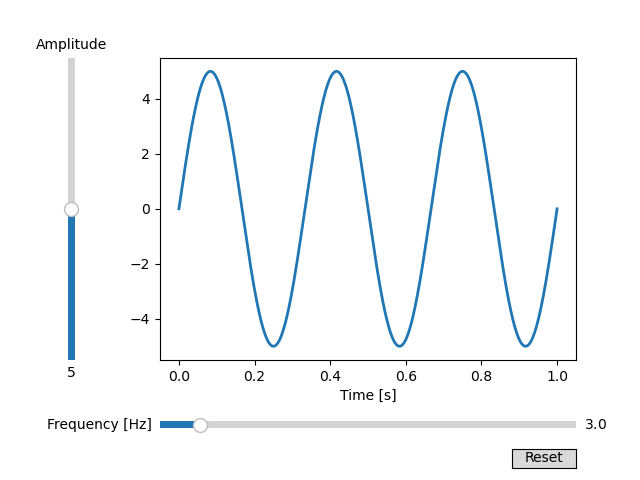

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


def affine_combination(pair, t):
    """Return intermediate point between two points."""
    x0, x1 = np.asarray(pair)
    return (1 - t) * x0 + t * x1


def casteljau_step(points, t):
    """One step of De Casteljau's algorithm.

    Takes a list of points.
    Returns a list of intermediate points.

    """
    return [affine_combination(pair, t)
            for pair in zip(points[:-1], points[1:])]


def plot_casteljau(points, t, ax=None):
    """Plot steps of De Casteljau's algorithm.

    t is supposed to be between 0 and 1.

    """
    if len(points) < 2:
        raise ValueError('We need at least two points')
    if ax is None:
        ax = plt.gca()
    ax.set_title(f'Bézier curve of degree {len(points) - 1}; t = {t:1.2f}')
    while len(points) >= 2:
        ax.plot(*np.asarray(points).T)
        points = casteljau_step(points, t)
        ax.scatter(*np.asarray(points).T)
    ax.axis('equal')
    result, = points
    return result


def create_animation(points, frames, ax=None, **kwargs):
    """Create matplotlib animation for De Casteljau's algorithm.

    ``**kwargs`` are passed to ``FuncAnimation()``.

    """
    if ax is None:
        ax = plt.gca()
    partial_curve = []

    def animation_func(t):
        ax.clear()
        if partial_curve:
            ax.plot(*np.asarray(partial_curve).T, '.', c='lightgrey')
        point = plot_casteljau(points, t, ax=ax)
        ax.scatter(*np.asarray(points).T, marker='x', c='black')
        partial_curve.append(point)

    times = np.linspace(0, 1, frames)
    return FuncAnimation(ax.figure, animation_func, frames=times, **kwargs)


In [7]:
from IPython.display import display, HTML

def show_casteljau_animation(points, frames=30, interval=200):
    ani = create_animation(points, frames=frames)
    display(HTML(ani.to_jshtml(default_mode='reflect')))
    plt.close()  # avoid spurious figure display

In [8]:
def linear(points, times):
    """Evaluate linear Bézier curve (given by two points) at given times."""
    return np.column_stack(sp.lambdify(t, b1)(times)) @ points

In [9]:
points = [
    (0, 0),
    (1, 0.5),
]


In [10]:
show_casteljau_animation(points)

In [11]:
show_casteljau_animation(points)


In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def series(dots, colr):
    a,b=[],[]
    for i in range(dots):
        a.append(random.randint(1,100))
        b.append(random.randint(1,100))
    plt.scatter(a,b, c=colr)
    return()
interact(series, dots=(1,100,1), colr=["red","orange","brown"]);


interactive(children=(IntSlider(value=50, description='dots', min=1), Dropdown(description='colr', options=('r…